In [ ]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import seaborn as sns
from torch.nn import functional as F
import torch
from torchvision.models import resnet34
from torchvision.models.feature_extraction import create_feature_extractor
import cv2

In [ ]:
# Загрузка изоръбражений

!wget https://img.razrisyika.ru/kart/22/1200/87275-kartinka-koshka-30.jpg -O sample_photo.jpg
# !wget https://pichold.ru/wp-content/uploads/2019/07/420440-Kycb.jpg -O sample_photo.jpg
# !wget https://avatars.mds.yandex.net/get-mpic/5243677/img_id632515319956267478.jpeg/orig -O sample_photo.jpg

--2023-12-05 16:49:45--  https://img.razrisyika.ru/kart/22/1200/87275-kartinka-koshka-30.jpg
Resolving img.razrisyika.ru (img.razrisyika.ru)... 5.189.239.45
Connecting to img.razrisyika.ru (img.razrisyika.ru)|5.189.239.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95373 (93K) [image/jpeg]
Saving to: ‘sample_photo.jpg’

sample_photo.jpg    100%[===================>]  93.14K   340KB/s    in 0.3s    

2023-12-05 16:49:46 (340 KB/s) - ‘sample_photo.jpg’ saved [95373/95373]



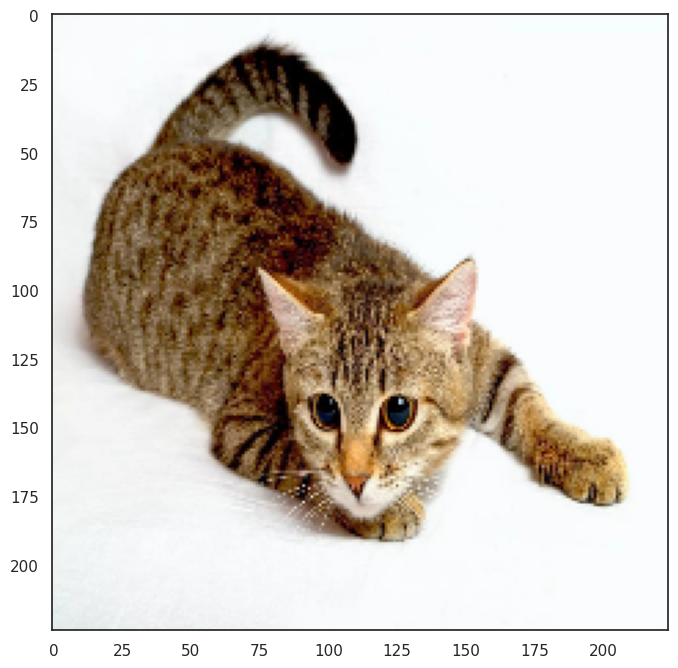

In [ ]:
sns.set(style="white")
img = cv2.imread("sample_photo.jpg") # Откроем изображаение
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_img = cv2.resize(RGB_img, (224, 224)) / 256
plt.figure(figsize=(12, 8))
plt.imshow(RGB_img) # Так как мы работаем с cv2, то вывод изображений через imshow

Свертка – это особый вид линейной операции. Сверточные сети – это просто нейронные сети, в которых вместо общей операции умножения на матрицу, по крайней мере в одном слое, используется свертка.

Операция свёртки:

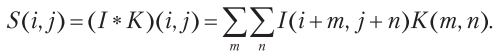

Иллюстрация работы свёртки:

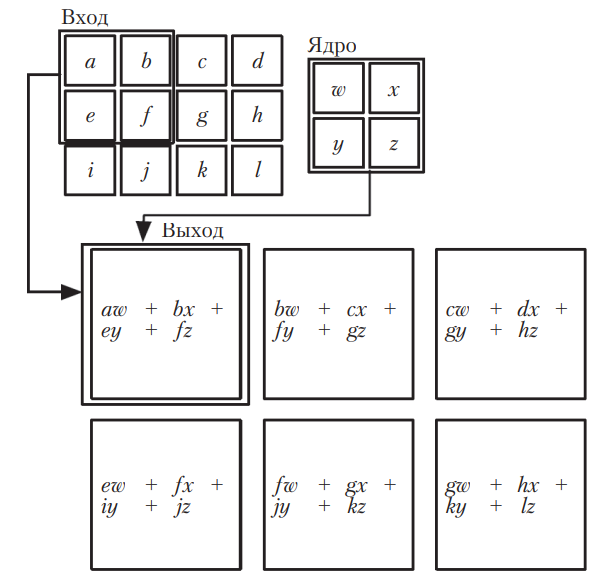

Иллюстрация применения свёртки к вектору:

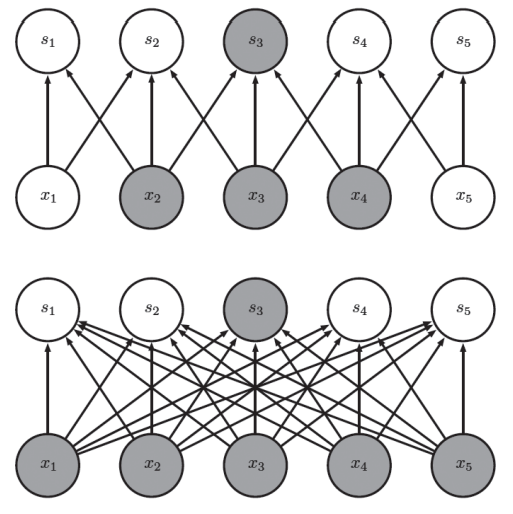

Свёртка ЧБ изображения может быть реализована с помощью всего двух функций:

In [ ]:
def apply_kernel(row, col, img, kernel):
    return (im3_t[row-1:row+2,col-1:col+2] * kernel).sum()

In [ ]:
def conv_2d(img, kernel):
    rng = range(1,len(img)-1)
    res = tensor([[apply_kernel(i,j, img, kernel) for j in rng] for i in rng])

Применим свёртку к ранее загруженному изображению

In [ ]:
img_t = torch.from_numpy(RGB_img).type(torch.float32).unsqueeze(0)
kernel = torch.tensor([
[0, 1, 0],
[1, -5, 1],
[0, 1, 0]
]).reshape(1, 1, 3, 3).type(torch.float32)

kernel = kernel.repeat(3, 3, 1, 1)
img_t = img_t.permute(0, 3, 1, 2)  # [BS, H, W, C] -> [BS, C, H, W]
img_t = nn.ReflectionPad2d(1)(img_t)  # Pad Image for same output size

result = F.conv2d(img_t, kernel)[0]  #

In [ ]:
result.shape

torch.Size([3, 224, 224])

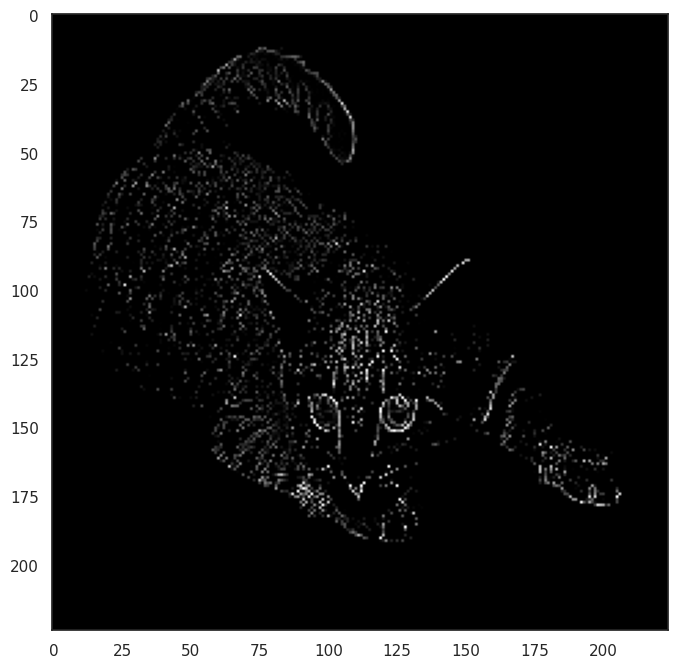

In [ ]:
plt.figure(figsize=(12, 8))
result_np = result.permute(1, 2, 0).numpy() / 3

plt.imshow(result_np)
plt.show()

Функция пулинга заменяет выход сети в некоторой точке сводной статистикой
близлежащих выходов. Пулинг позволяет сделать представление приблизительно инвариантным относительно малых параллельных переносов входа. Локальная инвариантность относительно параллельного переноса полезна, если нас больше интересует сам факт существования некоторого признака, а не его точное местонахождение. Например,
когда мы хотим определить, присутствует ли в изображении лицо, нам не важно положение глаз с точностью до пикселя, нужно только знать, есть ли глаз слева и глаз
справа.

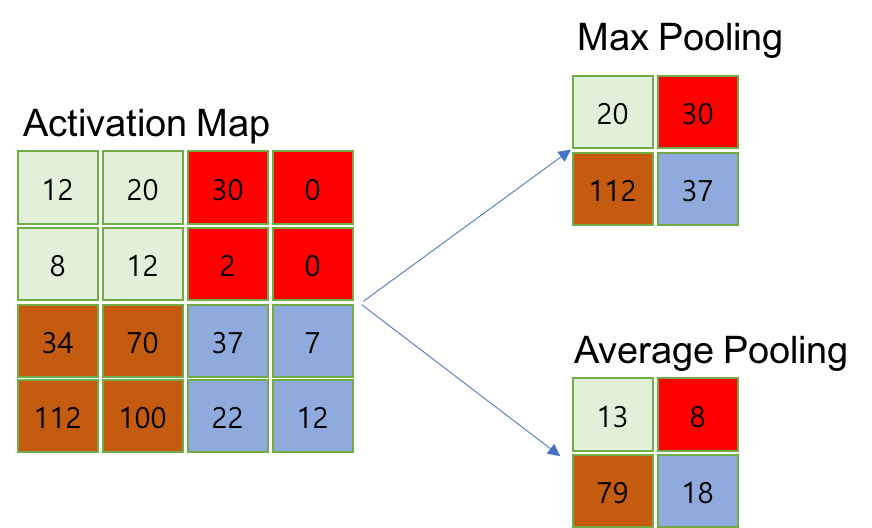

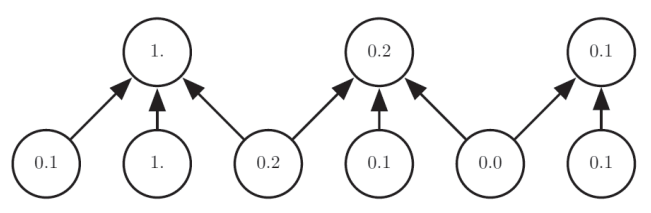

In [ ]:
result = F.max_pool2d(result, 2, 2)

In [ ]:
result.shape

torch.Size([3, 112, 112])

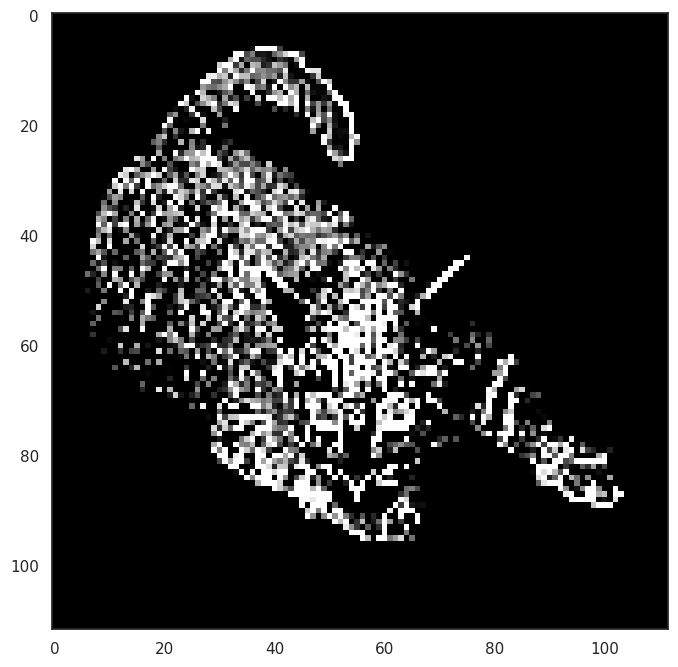

In [ ]:
plt.figure(figsize=(12, 8))
result_np = result.permute(1, 2, 0).numpy()

plt.imshow(result_np)
plt.show()

Повторим операции применения свёртки и пулинга

In [ ]:
kernel = torch.tensor([
[1, 1, 1],
[1, 1, 1],
[1, 1, 1]
]).reshape(1, 1, 3, 3).type(torch.float32)/25

kernel = kernel.repeat(3, 3, 1, 1)
img_t = result
img_t = nn.ReflectionPad2d(1)(img_t)  # Pad Image for same output size

result = F.conv2d(img_t, kernel)  #

In [ ]:
result.shape

torch.Size([3, 112, 112])

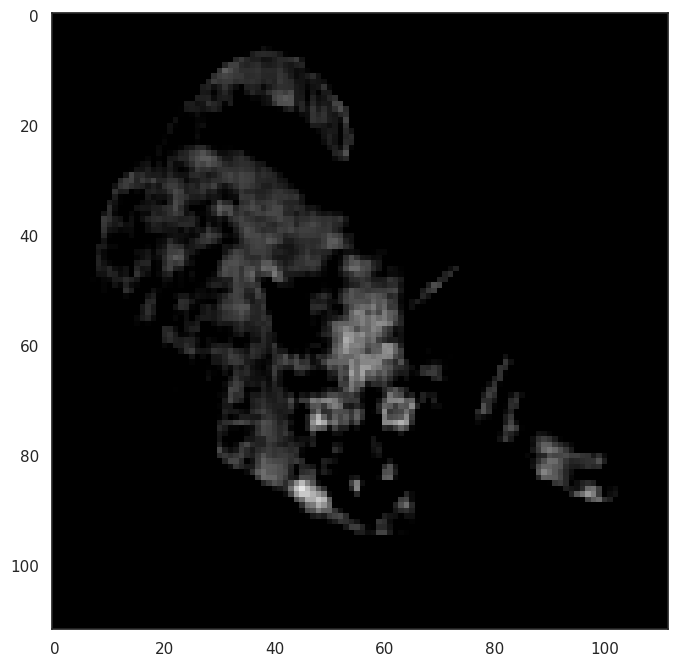

In [ ]:
plt.figure(figsize=(12, 8))
result_np = result.permute(1, 2, 0).numpy() / 3

plt.imshow(result_np)
plt.show()

In [ ]:
result = F.max_pool2d(result, 2, 2)

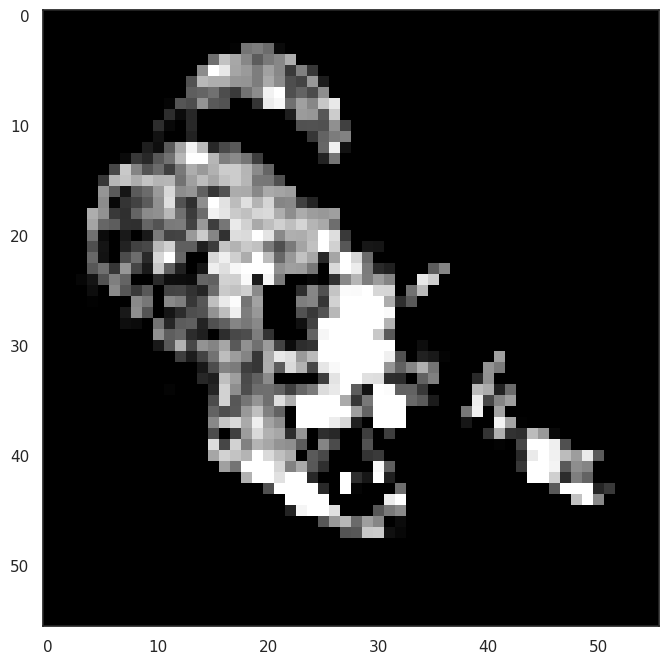

In [ ]:
plt.figure(figsize=(12, 8))
result_np = result.permute(1, 2, 0).numpy()

plt.imshow(result_np)
plt.show()

In [ ]:
kernel = torch.tensor([
[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]
]).reshape(1, 1, 3, 3).type(torch.float32)

kernel = kernel.repeat(3, 3, 1, 1)
img_t = result
img_t = nn.ReflectionPad2d(1)(img_t)  # Pad Image for same output size

result = F.conv2d(img_t, kernel)  #

In [ ]:
result.shape

torch.Size([3, 56, 56])

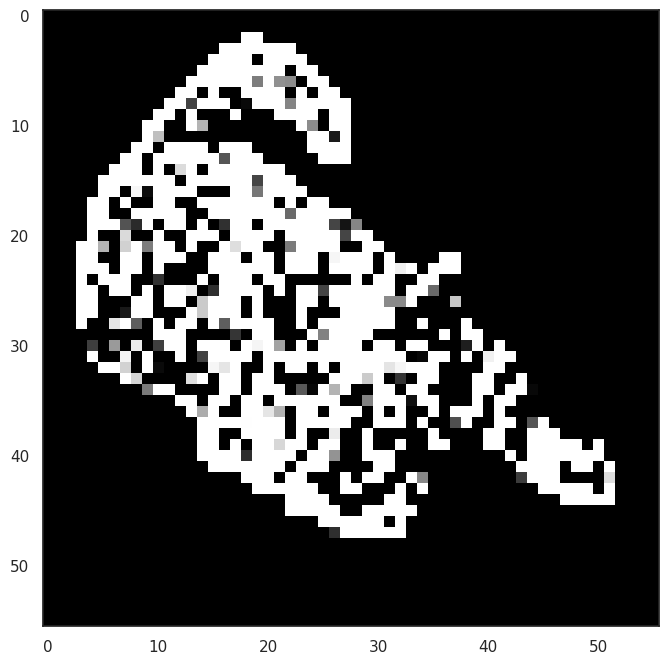

In [ ]:
plt.figure(figsize=(12, 8))
result_np = result.permute(1, 2, 0).numpy()

plt.imshow(result_np)
plt.show()

In [ ]:
result = F.max_pool2d(result, 2, 2)

In [ ]:
result.shape

torch.Size([3, 28, 28])

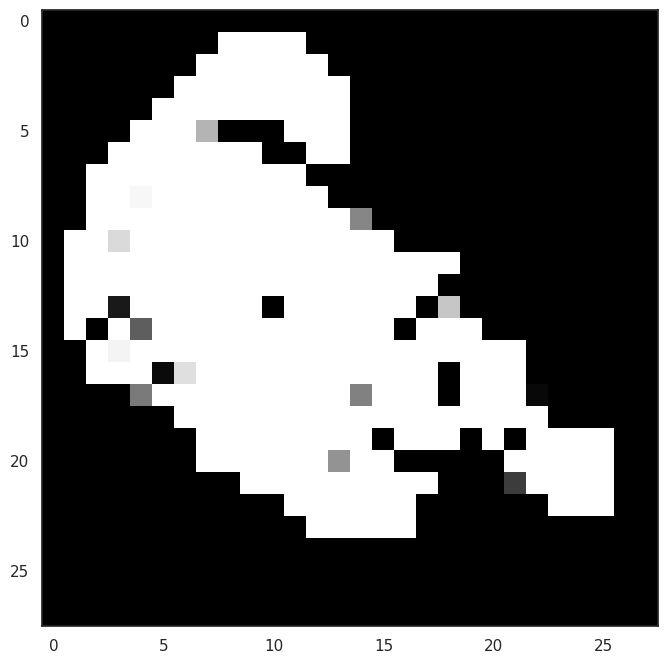

In [ ]:
plt.figure(figsize=(12, 8))
result_np = result.permute(1, 2, 0).numpy()

plt.imshow(result_np)
plt.show()

Представим результат в виде вектора, построчно развернув карту активаций

In [ ]:
result = result.view(-1)

In [ ]:
result.shape

torch.Size([2352])

Умножим на матрицу, чтобы получить итоговый вектор логитов

In [ ]:
matrix = torch.randn(result.shape[0], 10)

In [ ]:
F.relu(result @ matrix)

tensor([  0.0000,   0.0000,   0.0000, 545.9135,  60.4146, 272.1735,   0.0000,
          0.0000,   0.0000, 261.5223])

Получим вектор вероятностей каждого класса

In [ ]:
probs = F.relu(result @ matrix).softmax(0)

In [ ]:
probs

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

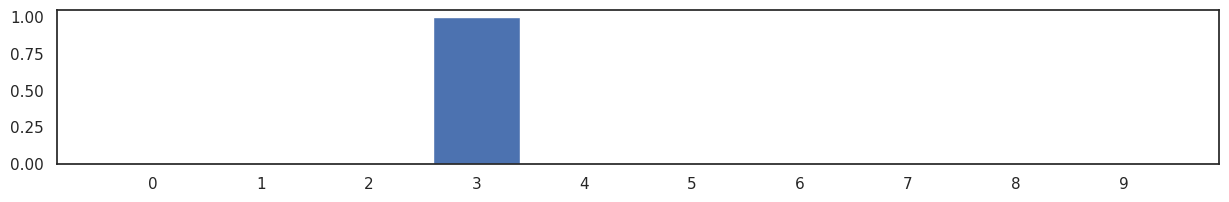

In [ ]:
plt.figure(figsize=(15, 2))
plt.bar(range(10), probs.numpy())
plt.xticks(range(10));

In [ ]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

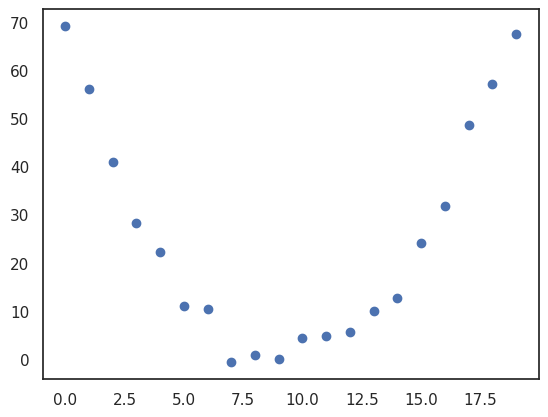

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [ ]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [ ]:
params = torch.randn(3).requires_grad_()

In [ ]:
orig_params = params.clone()

In [ ]:
preds = f(time, params)

In [ ]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, preds.detach().numpy(), color='red')
    ax.set_ylim(-300,100)

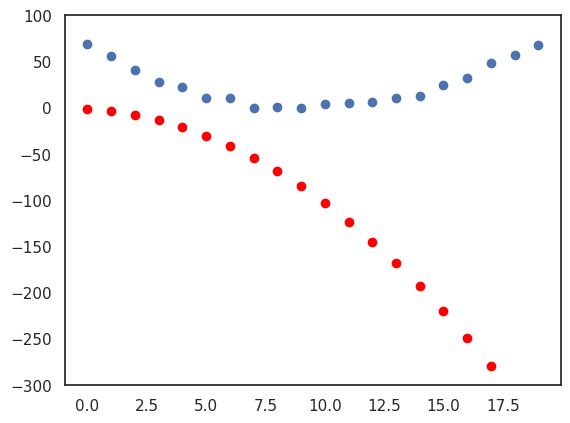

In [ ]:
show_preds(preds)

In [ ]:
loss = mse(preds, speed)
loss

tensor(35620.3750, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
params.grad

tensor([-62726.9961,  -4041.3174,   -297.3907])

In [ ]:
params.grad * 1e-5

tensor([-0.6273, -0.0404, -0.0030])

In [ ]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [ ]:
preds = f(time,params)
mse(preds, speed)

tensor(7271.1250, grad_fn=<MeanBackward0>)

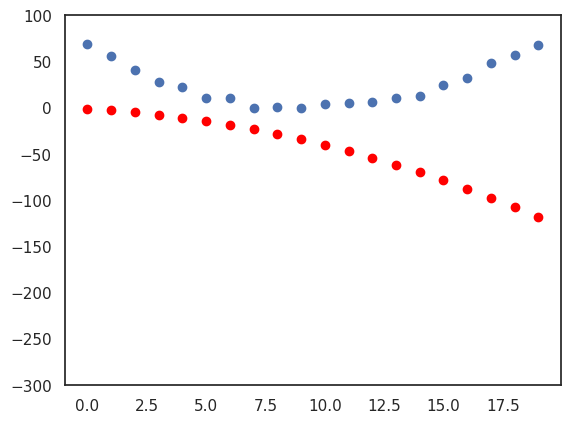

In [ ]:
show_preds(preds)

In [ ]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [ ]:
for i in range(10): apply_step(params)

7271.125
1906.5745849609375
891.4320068359375
699.330322265625
662.9729614257812
656.087158203125
654.7781982421875
654.52490234375
654.470947265625
654.4549560546875


In [ ]:
params = orig_params.detach().requires_grad_()

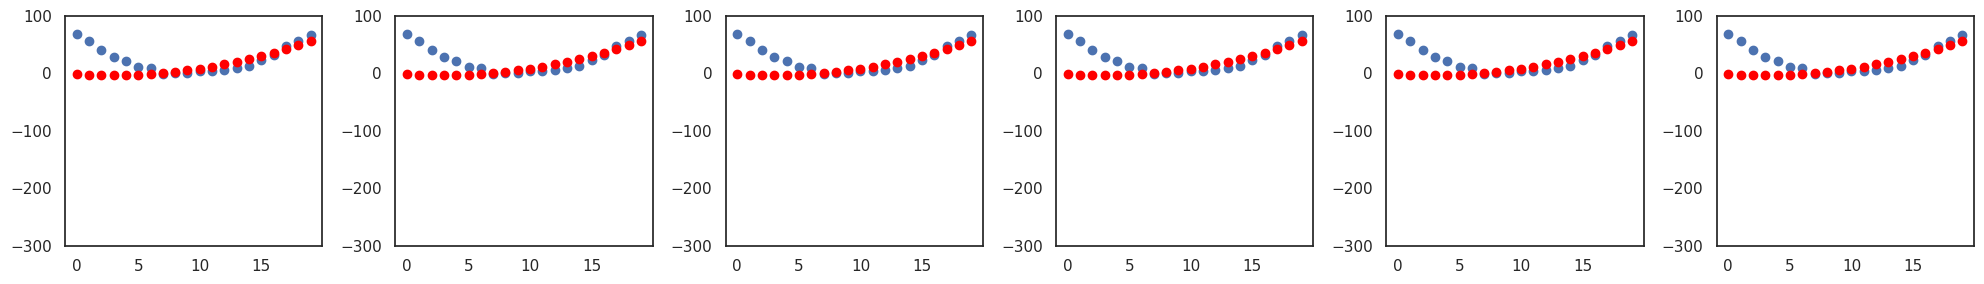

In [ ]:
_,axs = plt.subplots(1,6,figsize=(20,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

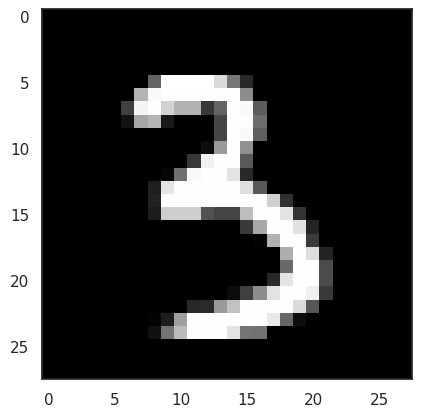

In [ ]:
seven1 = test_data[0][0]
seven2 = test_data[17][0]
three1 = test_data[30][0]
three2 = test_data[32][0]
plt.imshow(three2[0].numpy(), cmap='gray');

In [ ]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_relu_stack = nn.Sequential(
            nn.Conv2d(1, 32, (3,3), padding=1),
            nn.Conv2d(32, 32, (3,3), padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, (3,3), padding=1),
            nn.Conv2d(64, 64, (3,3), padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

    def forward(self, x):
        activs = self.conv_relu_stack(x)
        return activs

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.encoder = Encoder()
        self.classifier = nn.Sequential(
            nn.Linear(64*7*7, 10)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        logits = self.classifier(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (encoder): Encoder(
    (conv_relu_stack): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU()
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (classifier): Sequential(
    (0): Linear(in_features=3136, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.593936  [   64/60000]
loss: 0.741428  [ 6464/60000]
loss: 0.441682  [12864/60000]
loss: 0.404638  [19264/60000]
loss: 0.305327  [25664/60000]
loss: 0.281912  [32064/60000]
loss: 0.164889  [38464/60000]
loss: 0.259484  [44864/60000]
loss: 0.252380  [51264/60000]
loss: 0.228093  [57664/60000]
Test Error: 
 Accuracy: 95.6%, Avg loss: 0.181255 

Epoch 2
-------------------------------
loss: 0.219450  [   64/60000]
loss: 0.190769  [ 6464/60000]
loss: 0.132596  [12864/60000]
loss: 0.195208  [19264/60000]
loss: 0.125697  [25664/60000]
loss: 0.162615  [32064/60000]
loss: 0.088965  [38464/60000]
loss: 0.188047  [44864/60000]
loss: 0.179971  [51264/60000]
loss: 0.179145  [57664/60000]
Test Error: 
 Accuracy: 96.8%, Avg loss: 0.123339 

Epoch 3
-------------------------------
loss: 0.163844  [   64/60000]
loss: 0.157162  [ 6464/60000]
loss: 0.096302  [12864/60000]
loss: 0.140123  [19264/60000]
loss: 0.078452  [25664/60000]
loss: 0.136053  [32064/600

In [ ]:
encoder = model.encoder
encoder

Encoder(
  (conv_relu_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)

In [ ]:
model(three1[None].to(device)).argmax()

tensor(3, device='cuda:0')

In [ ]:
input = torch.stack((seven1, seven2, three1, three2))

In [ ]:
activations = encoder(input.to(device))
activations.shape

torch.Size([4, 64, 7, 7])

Text(0.5, 1.0, 'three2')

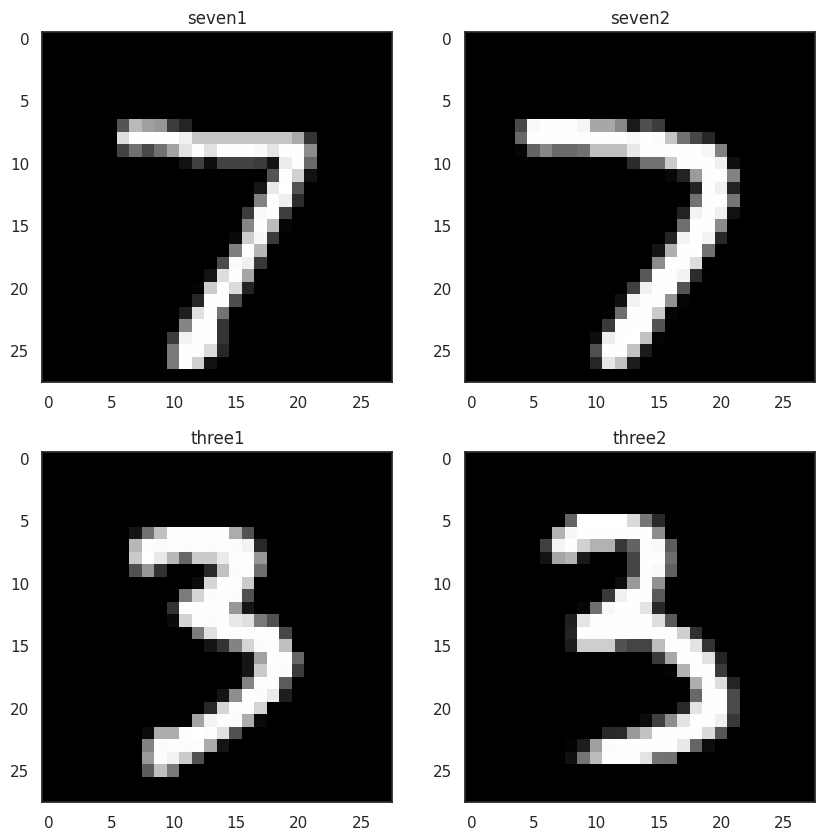

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(seven1[0].numpy(), cmap='gray')
axs[0, 0].set_title('seven1')
axs[0, 1].imshow(seven2[0].numpy(), cmap='gray')
axs[0, 1].set_title('seven2')

axs[1, 0].imshow(three1[0].numpy(), cmap='gray')
axs[1, 0].set_title('three1')
axs[1, 1].imshow(three2[0].numpy(), cmap='gray')
axs[1, 1].set_title('three2')

Text(0.5, 1.0, 'three2')

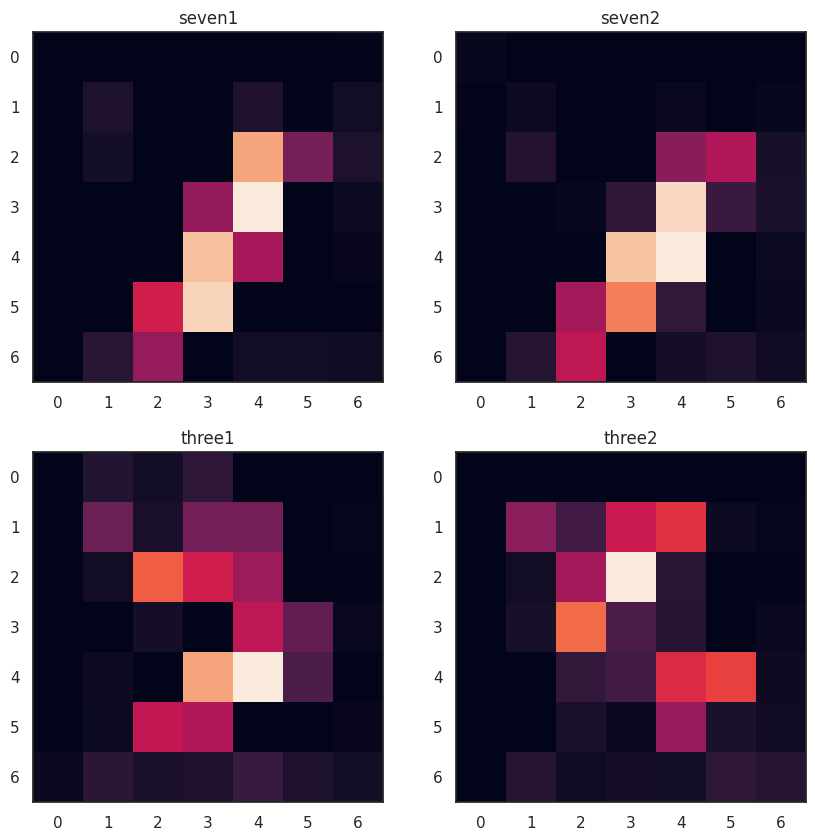

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

kernel_num = 15

axs[0, 0].imshow(activations[0][kernel_num].detach().cpu().numpy())
axs[0, 0].set_title('seven1')
axs[0, 1].imshow(activations[1][kernel_num].detach().cpu().numpy())
axs[0, 1].set_title('seven2')

axs[1, 0].imshow(activations[2][kernel_num].detach().cpu().numpy())
axs[1, 0].set_title('three1')
axs[1, 1].imshow(activations[3][kernel_num].detach().cpu().numpy())
axs[1, 1].set_title('three2')